<a href="https://colab.research.google.com/github/venussar/Roots-of-equations./blob/main/LAB_4_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* In an IPython notebook, copy the last function and find the first solution to the equation
    
$ 7 = \sqrt{x^2+1}+e^x\sin x $

<font color='red'>    
CLUE: this solution is within the interval $[0,2]$.
</font>

* Find all the roots in $(0,16)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print("Value for %d iterations:"%n,pi)
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

PRIMER VALOR

In [ ]:
#definimos funcion
def funcion(x):
    f = np.sqrt(x**2 + 1) + np.exp(x)*np.sin(x) - 7
    return f

a = 0.0 #dar valores
b = 2.0
Nmax = 20

result = Bisection(funcion, a, b, Nmax, False)
print(result)

1.6287174224853516


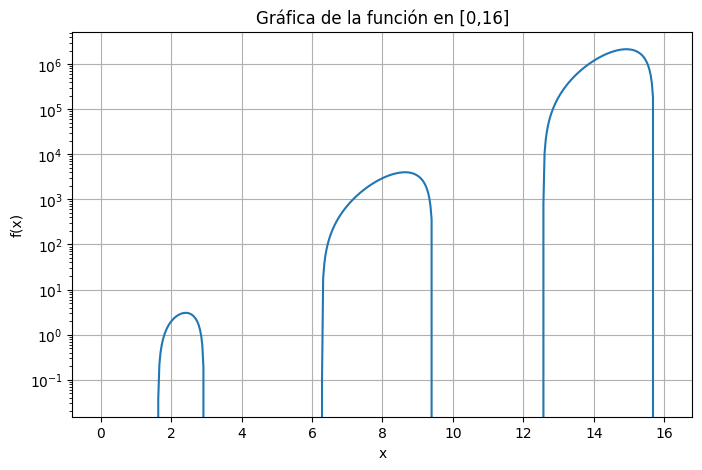

In [ ]:
x = np.linspace(0, 16, 500) # Crear un rango de valores entre 0 y 16
y = funcion(x)

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.yscale("log") # Escala logarítmica en y
plt.title("Gráfica de la función en [0,16]")
plt.grid(True)
plt.show()

In [ ]:
#definios funcion
def funcion(x):
    f = np.sqrt(x**2 + 1) + np.exp(x)*np.sin(x) - 7
    return f
a = 0.0 #dar valores
b = 16.0
Nmax = 20
paso=2

for i in range(int(a),int(b),paso): #Recorremos el intervalo [0, 16] en paso de dos
    x1, x2 = i, i +paso # cuando i=0 xi= 0 y x2=0+2  [0,2] cuando i=2, xi=2 y x2=2+2 [2,4] asi sucesivamente...
    y1, y2 = funcion(x1), funcion(x2) # evaluamos la función en ambos extremos

    if y1 * y2 < 0:  # Revisar cambio de signo
      raiz = Bisection(function, x1, x2, Nmax)
    print(f"Aproximación de la raíz en [{x1}, {x2}] = {raiz:.6f}")



Aproximación de la raíz en [0, 2] = 1.628717
Aproximación de la raíz en [2, 4] = 2.932158
Aproximación de la raíz en [4, 6] = 2.932158
Aproximación de la raíz en [6, 8] = 6.284372
Aproximación de la raíz en [8, 10] = 9.424978
Aproximación de la raíz en [10, 12] = 9.424978
Aproximación de la raíz en [12, 14] = 12.566351
Aproximación de la raíz en [14, 16] = 15.707964


When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius.

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [ ]:
Ro_0 = 18000
masa= 5.97e24
R_T = 6371000
M_g832c = 5.40*masa
L = 6500000

In [ ]:
M_g832c/(4*np.pi*Ro_0*L**3)

0.5189740611335176

RESOLVI LA INTEGRAL PARA UNA FUNCION


In [ ]:
#Fixed Point strategy
def FixedPoint( f, pini, Nmax):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    #Iterations
    for n in range(Nmax+3):
        pi.append( g(pi[n]) )

    pi = np.array( pi )
    #print(pi)

    return pi[-1]

In [ ]:
masa/(4*np.pi*Ro_0*L**3)

0.09610630761731809

In [ ]:
def g(x):
  c = M_g832c/(4*np.pi*Ro_0*L**3)
  return 2.-(x**2 + 2*x + 2)*np.exp(-x) -c

In [ ]:
x0 = 1.2  # o cualquier valor inicial que esté cerca de la solución
raiz = FixedPoint(g,x0,15)
print("Raíz aproximada:", raiz)

Raíz aproximada: 1.7629782311211286


In [ ]:
raiz*L #Radio del planeta


np.float64(11459358.502287336)